# Q1
Neonatal gut microbiome is dominated by Firmicutes. Immediately following birth, this phylum consists mostly of Enterococcus, bu with a significant portion of skin-associated microbes such as Staphylococcus and Curtobacterium genera; however, as infants are exposed to the outside environment, their gut is starting to be fully colonized by Enterococcus.

# Q2 
tetranucleotide frequency

# Q3
A) 5 bins

B) ( 1683638 + 2910568 + 2525062 + 2758136 + 2294654 ) / 38708237 = 0.31445653285; around 31.45%

C) The genomes seem to be a bit on the smaller size, but in the right order of magnitude for bacteria (~4Mb genome size for B. subtilis or E. coli)

D) Align each bin to prokaryote reference genome database; unaligned reads from the bin are likely contamination, and the part of reference genome with no coverage is missing reads

# Q4
A) See bash script; 
At genera level resolution, my results are:
bin 1: Staphylococcus;
bin 2: Leuconostoc;
bin 3: Staphylococcus;
bin 4: Enterococcus;
bin 5: Cutibacterium;
bin 6: Staphylococcus;
bin 7: Staphylococcus;
bin 8: Anaerococcus.

At species level resolution; my results are:
bin 1: Staphylococcus haemolyticus;
bin 2: Leuconostoc citreum;
bin 3: Staphylococcus lugdunensis;
bin 4: Enterococcus faecalis;
bin 5: Cutibacterium avidum;
bin 6: Staphylococcus epidermidis;
bin 7: Staphylococcus aureus;
bin 8: Anaerococcus prevotii.


B) We can simply BLAST the binned genomes against a 16S (or other phylogenetic marker gene) database and find the most abundant phylogeny assignment

# Q5
See Python script below
Note: I'm not certain which sample corresponds to which time point, so I assume they are organized in chronological order? 

Consistent with Q1 observation, Enterococcus outcompetes other microbes; however, the population dynamics of other genera is difficult to assess, as their signal is low on the heatmap to begin with.

In [1]:
import pandas as pd
import seaborn as sns

In [37]:
df=pd.read_csv('abundance_table.tab', sep='\t')

In [55]:
df

,Genomic bins,SRR492186,SRR492066,SRR492182,SRR492188,SRR492196,SRR492183,SRR492184,SRR492185,SRR492065,SRR492187,SRR492197,SRR492189,SRR492195,SRR492194,SRR492193,SRR492192,SRR492191,SRR492190
0,S. haemolyticus,167.273691,67.688884,54.858154,102.432386,335.756912,50.103235,96.383771,175.127948,71.420624,190.391037,72.544371,97.521190,49.834345,53.357374,172.449773,179.006341,14.685431,14.523105
1,E. faecalis,9348.741359,7247.577187,4178.397657,8139.870719,11597.033828,4115.242526,11633.667679,9219.720953,7240.045338,9979.380909,8745.103316,8308.156703,6646.119922,6550.505763,6267.155205,6151.257743,5780.879180,5267.858711
2,L citreum,8.887730,5.406628,1.986297,5.838109,8.348499,1.751119,31.799458,9.170054,6.087799,37.581807,19.275630,5.929623,3.451473,3.259988,1.804228,1.629252,4.652603,4.583909
3,C. avidum,0.552469,2034.534641,1232.387641,0.875860,0.436084,1566.783656,670.257316,0.747395,1869.640953,108.026882,4250.653466,0.356678,593.767516,457.543378,315.740755,282.011644,0.772755,1.251430
4,S epidermidis,820.872805,392.881731,1427.905710,1033.761424,1884.339618,1335.147536,1027.807284,850.342196,427.134461,2391.501197,936.681889,999.273162,1143.743857,1187.660153,1670.022745,1719.723610,1136.902519,1071.641137
5,S aureus,1.452063,681.886830,2.467008,1.347894,3.084744,1.287979,2124.191118,2.312693,714.809488,7.140755,590.194971,0.747525,1093.414384,1124.427189,6.459688,7.175036,1.496781,3.287205
6,A. prevotii,0.065351,3219.448810,0.223916,4.223711,0.698382,0.186461,889.316796,0.181546,3498.783627,1.199693,3366.910935,0.979570,71.465536,73.851083,1.211367,4.114233,0.088835,0.259990
7,S lugdunensis,6.194380,23.178964,2.759951,0.475050,1.563200,2.555610,1.259343,6.237916,24.206000,137.042032,10.595311,0.333899,6.668268,6.639770,78.291586,79.491024,0.523699,0.491073


In [56]:
bins_taxa={
    "bin.1": "S. haemolyticus", "bin.2": "L citreum", "bin.3": "S lugdunensis",
    "bin.4": "E. faecalis", "bin.5": "C. avidum", "bin.6": "S epidermidis",
    "bin.7": "S aureus", "bin.8": "A. prevotii"
}
df["Genomic bins"].replace(bins_taxa, inplace=True)

In [57]:
df

,Genomic bins,SRR492186,SRR492066,SRR492182,SRR492188,SRR492196,SRR492183,SRR492184,SRR492185,SRR492065,SRR492187,SRR492197,SRR492189,SRR492195,SRR492194,SRR492193,SRR492192,SRR492191,SRR492190
0,S. haemolyticus,167.273691,67.688884,54.858154,102.432386,335.756912,50.103235,96.383771,175.127948,71.420624,190.391037,72.544371,97.521190,49.834345,53.357374,172.449773,179.006341,14.685431,14.523105
1,E. faecalis,9348.741359,7247.577187,4178.397657,8139.870719,11597.033828,4115.242526,11633.667679,9219.720953,7240.045338,9979.380909,8745.103316,8308.156703,6646.119922,6550.505763,6267.155205,6151.257743,5780.879180,5267.858711
2,L citreum,8.887730,5.406628,1.986297,5.838109,8.348499,1.751119,31.799458,9.170054,6.087799,37.581807,19.275630,5.929623,3.451473,3.259988,1.804228,1.629252,4.652603,4.583909
3,C. avidum,0.552469,2034.534641,1232.387641,0.875860,0.436084,1566.783656,670.257316,0.747395,1869.640953,108.026882,4250.653466,0.356678,593.767516,457.543378,315.740755,282.011644,0.772755,1.251430
4,S epidermidis,820.872805,392.881731,1427.905710,1033.761424,1884.339618,1335.147536,1027.807284,850.342196,427.134461,2391.501197,936.681889,999.273162,1143.743857,1187.660153,1670.022745,1719.723610,1136.902519,1071.641137
5,S aureus,1.452063,681.886830,2.467008,1.347894,3.084744,1.287979,2124.191118,2.312693,714.809488,7.140755,590.194971,0.747525,1093.414384,1124.427189,6.459688,7.175036,1.496781,3.287205
6,A. prevotii,0.065351,3219.448810,0.223916,4.223711,0.698382,0.186461,889.316796,0.181546,3498.783627,1.199693,3366.910935,0.979570,71.465536,73.851083,1.211367,4.114233,0.088835,0.259990
7,S lugdunensis,6.194380,23.178964,2.759951,0.475050,1.563200,2.555610,1.259343,6.237916,24.206000,137.042032,10.595311,0.333899,6.668268,6.639770,78.291586,79.491024,0.523699,0.491073


In [59]:
df_reads=df.iloc[:, 1:]
df_reads

,SRR492186,SRR492066,SRR492182,SRR492188,SRR492196,SRR492183,SRR492184,SRR492185,SRR492065,SRR492187,SRR492197,SRR492189,SRR492195,SRR492194,SRR492193,SRR492192,SRR492191,SRR492190
0,167.273691,67.688884,54.858154,102.432386,335.756912,50.103235,96.383771,175.127948,71.420624,190.391037,72.544371,97.521190,49.834345,53.357374,172.449773,179.006341,14.685431,14.523105
1,9348.741359,7247.577187,4178.397657,8139.870719,11597.033828,4115.242526,11633.667679,9219.720953,7240.045338,9979.380909,8745.103316,8308.156703,6646.119922,6550.505763,6267.155205,6151.257743,5780.879180,5267.858711
2,8.887730,5.406628,1.986297,5.838109,8.348499,1.751119,31.799458,9.170054,6.087799,37.581807,19.275630,5.929623,3.451473,3.259988,1.804228,1.629252,4.652603,4.583909
3,0.552469,2034.534641,1232.387641,0.875860,0.436084,1566.783656,670.257316,0.747395,1869.640953,108.026882,4250.653466,0.356678,593.767516,457.543378,315.740755,282.011644,0.772755,1.251430
4,820.872805,392.881731,1427.905710,1033.761424,1884.339618,1335.147536,1027.807284,850.342196,427.134461,2391.501197,936.681889,999.273162,1143.743857,1187.660153,1670.022745,1719.723610,1136.902519,1071.641137
5,1.452063,681.886830,2.467008,1.347894,3.084744,1.287979,2124.191118,2.312693,714.809488,7.140755,590.194971,0.747525,1093.414384,1124.427189,6.459688,7.175036,1.496781,3.287205
6,0.065351,3219.448810,0.223916,4.223711,0.698382,0.186461,889.316796,0.181546,3498.783627,1.199693,3366.910935,0.979570,71.465536,73.851083,1.211367,4.114233,0.088835,0.259990
7,6.194380,23.178964,2.759951,0.475050,1.563200,2.555610,1.259343,6.237916,24.206000,137.042032,10.595311,0.333899,6.668268,6.639770,78.291586,79.491024,0.523699,0.491073


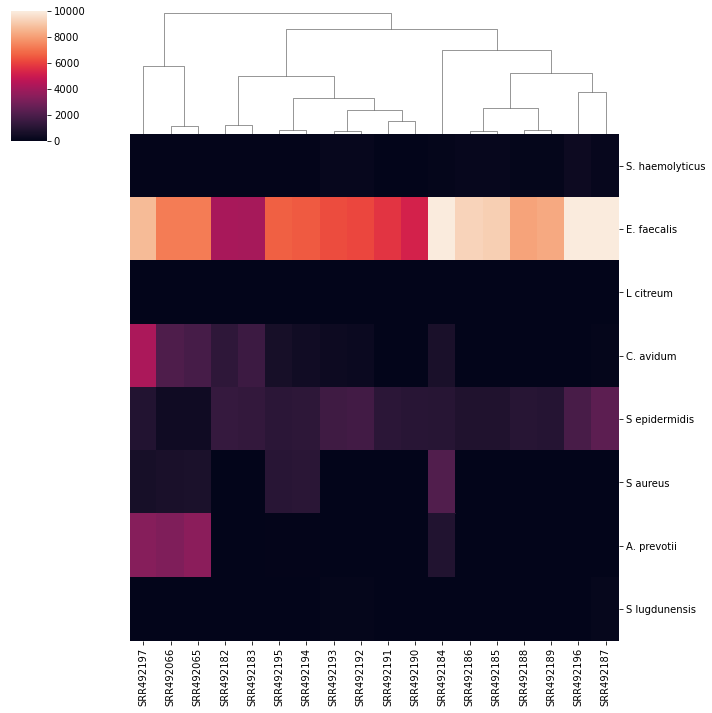

In [60]:

y_axis_labels = sp_list

sns.clustermap(df_reads, row_cluster=False, vmin=0, vmax=10000, yticklabels=y_axis_labels)
sp_list=df['Genomic bins'].to_list()
